In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['text.usetex'] = True

In [2]:
azc = pd.read_csv('./data/azcounties.csv')

In [3]:
psi_i = azc['population'] / np.sum(azc['population'])
print(" & ".join(
        [str(np.around(psi_i[j], 2)) for j in range(13)]))
t_psi = azc['housing'] / psi_i
print(" & ".join(
        [str(np.around(t_psi[j]/100000, 2)) for j in range(13)]))

0.04 & 0.08 & 0.08 & 0.03 & 0.02 & 0.01 & 0.01 & 0.12 & 0.06 & 0.25 & 0.03 & 0.13 & 0.12
7.67 & 8.07 & 7.81 & 10.47 & 5.93 & 7.81 & 13.15 & 9.25 & 8.89 & 6.83 & 6.56 & 8.58 & 7.38


In [4]:
v_psi = psi_i * (t_psi - np.sum(azc['housing']))**2
print(np.sum(v_psi))

13620222733.706547


In [5]:
psi_i = np.repeat(1/13, 13)
print(" & ".join(
        [str(np.around(psi_i[j], 2)) for j in range(13)]))
t_psi = azc['housing'] / psi_i
print(" & ".join(
        [str(np.around(t_psi[j]/100000, 2)) for j in range(13)]))

0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08
4.27 & 7.91 & 8.51 & 4.34 & 1.74 & 0.58 & 2.12 & 14.8 & 7.51 & 22.28 & 2.37 & 14.98 & 11.92


In [6]:
v_psi = psi_i * (t_psi - np.sum(azc['housing']))**2
print(np.sum(v_psi))

386553128504.00006


In [7]:
np.random.seed(2023)
r = np.zeros(3)
ii = 0
while True:
    np.random.seed(np.random.randint(0, 1000000))
    temp_r = np.random.randint(0, 12, 1)
    temp_m = np.random.randint(0, np.max(azc['population']), 1)
    if temp_m < azc['population'][temp_r[0]]:
        r[ii] = temp_r
        ii += 1
        if ii == 2:
            break
    else:
        pass

In [8]:
t_i = azc['housing'][r]
psi_i = azc['population'][r] / np.sum(azc['population'])
t_hat = 1/3 * np.sum(t_i/psi_i)
var_t_hat = 1/6 * np.sum((t_i/psi_i - t_hat)**2)
print(t_hat, var_t_hat)

963120.4665469097 31128495318.55437


In [9]:
r

array([1., 6., 0.])

## 6.9.8

In [10]:
m_i = np.array([65,25,48,65,2,62,65,62,61,41])
psii = np.array([0.0805452,0.0309789,0.0594796,0.0805452,0.0024783,0.0768278,0.0805452,0.0768278,0.0755886,0.0508055])
t_i = np.array([7,5,1,1,2,9,4,5,8,22])

In [11]:
u_i = t_i/psii
t_hat = 1/10 * np.sum(u_i)
v_t_hat = 1/90 * np.sum((u_i - t_hat)**2)
se_t_hat = np.sqrt(v_t_hat)
print(t_hat, se_t_hat)

185.5287890566302 78.89676647906609


In [12]:
print(t_hat/807, se_t_hat/807)

0.22989936686075613 0.09776550988731857


## 6.9.13

In [13]:
state = pd.read_csv('./data/statepop.csv')

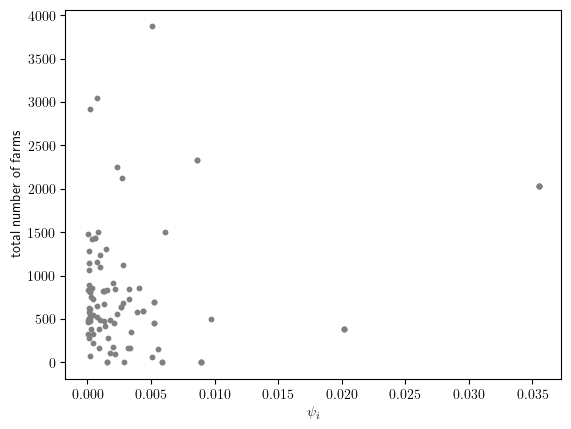

In [14]:
plt.scatter(state['psii'], state['numfarm'], color='grey', s=10)
plt.xlabel(r'$\psi_i$')
plt.ylabel('total number of farms')
plt.savefig('./figure/6.9.13.pdf')

In [15]:
t_i = state['numfarm']
psi_i = state['psii']
u_i = t_i / psi_i
t_hat = 1/100 * np.sum(u_i)
v_t_hat = 1/9900 * np.sum((u_i - t_hat)**2)
se_t_hat = np.sqrt(v_t_hat)
ci_t_hat = (t_hat - 1.96*se_t_hat, t_hat + 1.96*se_t_hat)
print(t_hat, ci_t_hat)

1896300.2673146422 (1176152.1590619693, 2616448.375567315)


In [16]:
print(np.mean(t_i)*3078)
print(np.sqrt(np.var(t_i, ddof=1)) * 3078)

2485792.8000000003
2211220.8004997848


## 6.9.32

In [17]:
m_i = np.array([5,4,8,5,3])
t_i = np.array([20, 25, 38, 24, 21])

In [18]:
pi_i = 2 * m_i / np.sum(m_i)
phi_i = pi_i /2
a_i = (phi_i * (1 - phi_i)) / (1 - pi_i)
def pi_ij(i, j):
    return (phi_i[i] * phi_i[j]) / np.sum(a_i) * (1/(1-pi_i[i]) + 1/(1-pi_i[j]))

In [19]:
pi = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        pi[i,j] = pi_ij(i,j)
for i in range(5):
    pi[i,i] = 0
pi

array([[0.        , 0.06809146, 0.1929258 , 0.09043397, 0.04854876],
       [0.06809146, 0.        , 0.1475315 , 0.06809146, 0.03628558],
       [0.1929258 , 0.1475315 , 0.        , 0.1929258 , 0.10661689],
       [0.09043397, 0.06809146, 0.1929258 , 0.        , 0.04854876],
       [0.04854876, 0.03628558, 0.10661689, 0.04854876, 0.        ]])

In [20]:
ht = np.sum((1 - pi_i)/pi_i * t_i**2)
for i in range(5):
    for j in range(5):
        if i == j:
            pass
        else:
            ht += (pi[i, j] - pi_i[i] * pi_i[j]) / pi[i, j] * t_i[i] * t_i[j]

In [21]:
ht = 0
for i in range(5):
    for j in range(5):
        if i == j:
            pass
        else:
            temp = (pi_i[i] * pi_i[j] - pi[i, j]) * (t_i[i]/pi_i[i] - t_i[j]/pi_i[j])**2
            ht += temp
v_yht = ht / 2 / (np.sum(m_i)**2)
print(v_yht)

0.3889061129258049


In [22]:
y = list(range(5))
v = np.zeros(5)
y[0] = np.array([3, 5, 4, 6, 2])
y[1] = np.array([7,4,7,7])
y[2] = np.array([7,2,9,4,5,3,2,6])
y[3] = np.array([2,5,3,6,8])
y[4] = np.array([9,7,5])
for i in range(5):
    v[i] = m_i[i]**2 * (1/2-1/m_i[i]) * np.var(y[i], ddof=1)

In [23]:
(ht/2 + np.sum(v/pi_i)) / np.sum(m_i)**2

1.0927632557829479

In [24]:
(1/25)*(48/0.64+20/0.4)

5.0

In [25]:
sample = np.array([2, 3])
t_i_hat = np.array([48, 20])
v_i_hat = np.array([18, 8])
def v_ht():
    part1 = (1-pi_i[2]) * (t_i_hat[0]**2/pi_i[2]**2) + (1-pi_i[3]) * (t_i_hat[1]**2/pi_i[3]**2)
    part2 = (pi[2,3]-pi_i[2]*pi_i[3])/pi[2,3] * t_i_hat[0] * t_i_hat[1] / pi_i[2] / pi_i[3]
    part3 = v_i_hat[0] / pi_i[2] + v_i_hat[1] / pi_i[3]
    return part1 + part2 + part3
vht = v_ht()
def v_syg():
    part1 = (pi_i[2]*pi_i[3] - pi[2,3])/pi[2,3] * (t_i_hat[0]/pi_i[2] - t_i_hat[1]/pi_i[3])**2
    part2 = v_i_hat[0] / pi_i[2] + v_i_hat[1] / pi_i[3]
    return part1 + part2
vsyg = v_syg()
def v_wr():
    return 2 * ((t_i_hat[0]/pi_i[2] - 125/2)**2 + (t_i_hat[1]/pi_i[3] - 125/2)**2)
vwr = v_wr()
print(vht/np.sum(m_i)**2, vsyg/np.sum(m_i)**2, vwr/np.sum(m_i)**2)

3.755390092879258 0.4039349845201237 1.0


In [26]:
print(np.sqrt(vht/np.sum(m_i)**2), np.sqrt(vsyg/np.sum(m_i)**2), np.sqrt(vwr/np.sum(m_i)**2))

1.937882889361289 0.6355587970598187 1.0
